# k-Nearest Neighbors Classifiers. Grid Search

## Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

## Configuration

In [2]:
DATASET_FILE = "datasets/mnist.csv"
FIRST_IMAGES_TO_DISPLAY = 5
PIXELS_PER_DIMENSION = 28
TRAIN_ENTRIES = 60000
NEIGHBORS_COUNT = 5
TESTED_INDEX = TRAIN_ENTRIES
ERRORS_TO_SHOW = 3
CLASS_ERRORS_TO_SHOW = 0
NUMBERS_TO_TEST = [3, 5, 7]
DISTANCES_TO_TEST = ["euclidean"]

## Dataset Import

In [3]:
mnist_df = pd.read_csv(DATASET_FILE)

In [4]:
X = mnist_df.loc[:, mnist_df.columns != "class"]
y = mnist_df["class"]
print("The shapes of the vectors are {} and {}".format(X.shape, y.shape))

The shapes of the vectors are (70000, 784) and (70000,)


## Dataset Exploration

In [5]:
def display_image(pixels: list) -> None:
    pixels = pixels.reshape([PIXELS_PER_DIMENSION, PIXELS_PER_DIMENSION])

    pyplot.gray()
    pyplot.imshow(pixels)
    pyplot.show()

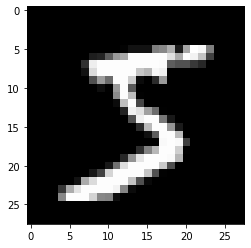

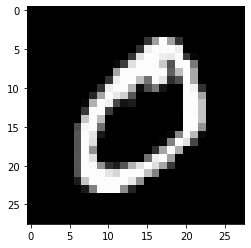

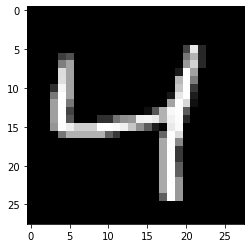

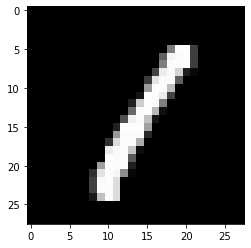

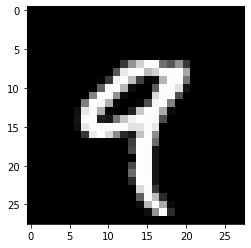

In [6]:
for i in range(FIRST_IMAGES_TO_DISPLAY):
    pixels = mnist_df.iloc[i].to_numpy()[:-1]
    display_image(pixels)

In [7]:
def generate_distribution_plot(dataframe: pd.DataFrame) -> None:
    entries_per_class = dataframe.groupby(["class"])["pixel1"].count()

    classes = dataframe["class"]
    classes_names = [str(current_class) for current_class in np.sort(classes.unique())]

    entries_per_class_df = pd.DataFrame({
        "names": classes_names,
        "count": entries_per_class.values
    })

    plot = sns.barplot(x="names", y="count", data=entries_per_class_df)
    plot.set_xlabel("Class Name")
    plot.set_ylabel("Entries Count")
    plot.set_title("Distribution of Entries by Class")
    plot.legend([],[], frameon=False)
    pyplot.show()

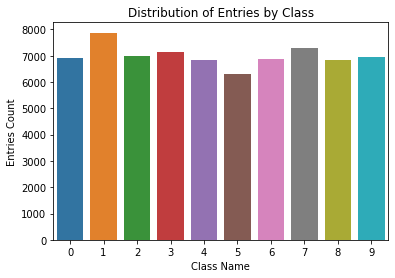

In [8]:
generate_distribution_plot(mnist_df)

## Dataset Splitting

In [9]:
X_train = X[:TRAIN_ENTRIES]
y_train = y[:TRAIN_ENTRIES]
X_test = X[TRAIN_ENTRIES:]
y_test = y[TRAIN_ENTRIES:]

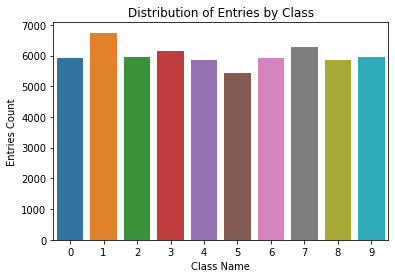

In [10]:
generate_distribution_plot(mnist_df[:TRAIN_ENTRIES])

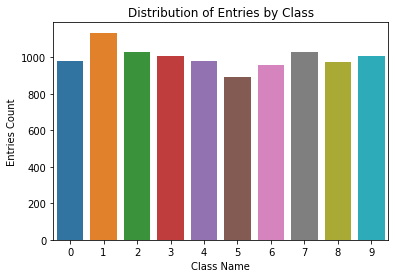

In [11]:
generate_distribution_plot(mnist_df[TRAIN_ENTRIES:])

## Model Training

In [12]:
model = KNeighborsClassifier(n_neighbors=NEIGHBORS_COUNT)
model.fit(X_train, y_train)

KNeighborsClassifier()

The predicted probabilities are:
    - 0.0 for letter 0
    - 0.0 for letter 1
    - 0.0 for letter 2
    - 0.0 for letter 3
    - 0.0 for letter 4
    - 0.0 for letter 5
    - 0.0 for letter 6
    - 1.0 for letter 7
    - 0.0 for letter 8
    - 0.0 for letter 9

The image is:


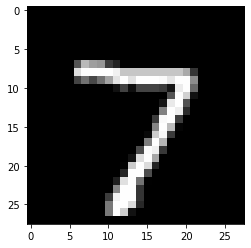

In [13]:
# Make a prediction
random_image = X_test.loc[TRAIN_ENTRIES]
probabilities = model.predict_proba([random_image])

# Display the probabilities
print("The predicted probabilities are:")
for index, probability in enumerate(probabilities[0]):
    print("    - {} for letter {}".format(probability, index))
print()

# Display the image
print("The image is:")
display_image(random_image.to_numpy())

## Model Evaluation

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Model's accuracy is {:.2f}.".format(accuracy))

Model's accuracy is 0.97.


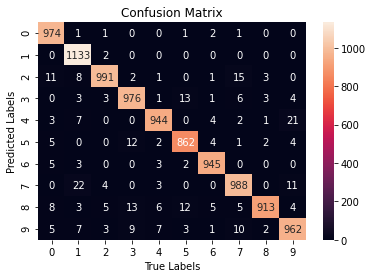

In [16]:
matrix = confusion_matrix(y_test, y_pred).round(1)

plot = sns.heatmap(matrix, annot=True, fmt="d")
plot.set_xlabel("True Labels")
plot.set_ylabel("Predicted Labels")
plot.set_title("Confusion Matrix")
plot.legend([],[], frameon=False)
pyplot.show()

The predicted labels for this image (with a 0) was 2.


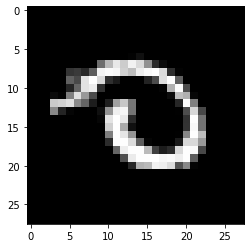

The predicted labels for this image (with a 0) was 7.


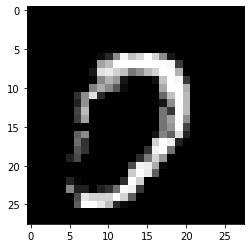

The predicted labels for this image (with a 0) was 5.


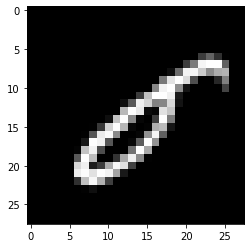

In [17]:
shown_images_count = 0
for index, (real_label, predicted_label) in enumerate(zip(y_test, y_pred)):
    if (real_label == CLASS_ERRORS_TO_SHOW and real_label != predicted_label):
        print("The predicted labels for this image (with a {}) was {}.".format(CLASS_ERRORS_TO_SHOW, predicted_label))
        display_image(X_test.loc[TRAIN_ENTRIES + index].to_numpy())

        shown_images_count += 1
        if (shown_images_count == ERRORS_TO_SHOW):
            break

## Model Training via Grid Search

In [18]:
parameters = {
    "n_neighbors": NUMBERS_TO_TEST,
    "metric": DISTANCES_TO_TEST
}
model = KNeighborsClassifier()
model_search = GridSearchCV(model, parameters, verbose=4)
model_search.fit(X, y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ................metric=euclidean, n_neighbors=3; total time=  37.1s
[CV 2/5] END ................metric=euclidean, n_neighbors=3; total time=  33.3s
[CV 3/5] END ................metric=euclidean, n_neighbors=3; total time=  34.4s
[CV 4/5] END ................metric=euclidean, n_neighbors=3; total time=  34.6s
[CV 5/5] END ................metric=euclidean, n_neighbors=3; total time=  33.0s
[CV 1/5] END ................metric=euclidean, n_neighbors=5; total time=  40.7s
[CV 2/5] END ................metric=euclidean, n_neighbors=5; total time=  38.7s
[CV 3/5] END ................metric=euclidean, n_neighbors=5; total time=  38.1s
[CV 4/5] END ................metric=euclidean, n_neighbors=5; total time=  38.2s
[CV 5/5] END ................metric=euclidean, n_neighbors=5; total time=  38.7s
[CV 1/5] END ................metric=euclidean, n_neighbors=7; total time=  40.1s
[CV 2/5] END ................metric=euclidean, n_

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'], 'n_neighbors': [3, 5, 7]},
             verbose=4)

In [19]:
results = model_search.cv_results_
print("The scores of the models are:")
for parameters, score in zip(results["params"], results["mean_test_score"]):
    print("    - {:.2f} for parameters ('{}', {})".format(score.round(2), parameters["metric"], parameters["n_neighbors"]))

The scores of the models are:
    - 0.97 for parameters ('euclidean', 3)
    - 0.97 for parameters ('euclidean', 5)
    - 0.97 for parameters ('euclidean', 7)
